<font size=5>以下默认为对最近三年的数据进行分析，即2022、2021、2020年的数据分析</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
data=pd.read_excel('./hd.xlsx')

In [3]:
data.head().T

0  \
Unnamed: 0                                                       0   
consultCategory                                                 咨询   
consultTitle                                                  政策查询   
consultName                                                      姜   
consultDate                                    2022-06-13 23:14:59   
consultId                                         2022061300000072   
consultState                                                   已办结   
consultContent   您好麻烦了我需要查找一带一路相关的自治区级发布的全部政策文件但官网上输入关键词一带一路丝绸之...   
answerDate                                     2022-06-14 19:46:42   
answerContent    ['您好您可通过自治区人民政府门户网站及各政府部门网站的政府信息公开或政务公开等栏目检索查询...   

                                   1                      2  \
Unnamed: 0                         1                      2   
consultCategory                   咨询                     咨询   
consultTitle          请问新疆夏季作息时间是怎样的  请问乌鲁木齐市疫情防控指挥部联系电话是多少   
consultName                        唐                      张   
consultDate      2022-05-05 14:26:33    2022-02-25 10:57:48   
consultId           2022050500000016       2022022500000009   
consultState                     已办结                    已办结   
consultContent        请问新疆夏季作息时间是怎样的  请问乌鲁木齐市疫情防控指挥部联系电话是多少   
answerDate       2022-05-06 13:14:36    2022-02-25 13:52:08   
answerContent                     []      ['您好疫情防控指挥部咨询热线']   

                                               3                    4  
Unnamed: 0                                     3                    4  
consultCategory                               建议                   咨询  
consultTitle                                申请公开              年度二级建造师  
consultName                                    张                    董  
consultDate                  2021-12-16 13:31:38  2021-10-10 16:46:34  
consultId                       2021121600000022     2021101000000021  
consultState                                 已办结                  已办结  
consultContent   您好我有一个文件想申请请问贵单位政府信息公开申请邮寄地址是哪里      新疆年二级建造师什么时候出成绩  
answerDate                   2021-12-17 14:39:43  2021-10-14 13:40:58  
answerContent                             ['您好']                   []

In [4]:
data.describe()

Unnamed: 0
count   79.000000
mean    39.000000
std     22.949219
min      0.000000
25%     19.500000
50%     39.000000
75%     58.500000
max     78.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       79 non-null     int64 
 1   consultCategory  79 non-null     object
 2   consultTitle     79 non-null     object
 3   consultName      51 non-null     object
 4   consultDate      79 non-null     object
 5   consultId        79 non-null     object
 6   consultState     79 non-null     object
 7   consultContent   79 non-null     object
 8   answerDate       79 non-null     object
 9   answerContent    79 non-null     object
dtypes: int64(1), object(9)
memory usage: 6.3+ KB


In [6]:
usedData=data[['consultCategory','consultState','consultDate']]

In [7]:
usedData.head()

consultCategory consultState          consultDate
0              咨询          已办结  2022-06-13 23:14:59
1              咨询          已办结  2022-05-05 14:26:33
2              咨询          已办结  2022-02-25 10:57:48
3              建议          已办结  2021-12-16 13:31:38
4              咨询          已办结  2021-10-10 16:46:34

In [8]:
usedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   consultCategory  79 non-null     object
 1   consultState     79 non-null     object
 2   consultDate      79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


   
    
<font size=5 face=雅黑>
    缺失值
</font>

In [9]:
(usedData.isnull()).sum()

consultCategory    0
consultState       0
consultDate        0
dtype: int64

In [10]:
usedData.dropna(how='all',inplace=True)

C:\Users\86152\AppData\Local\Temp\ipykernel_31764\2911082158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedData.dropna(how='all',inplace=True)


<font size=5>此处困扰了我好久，我以为报错了，没有执行，结果我后来发现是all，因为排除后两条数据，前面的我还要用所以肯定删除不了，但把how的参数改成any就会删除掉，所以这一步还是正常执行了的</font>

In [11]:
(usedData.isnull()).sum()

consultCategory    0
consultState       0
consultDate        0
dtype: int64

In [12]:
(usedData.isnull()).sum()

consultCategory    0
consultState       0
consultDate        0
dtype: int64

<font size=5>检验重复值</font>

In [13]:
(usedData.duplicated()).sum()

0

<font size=3>默认将non值放在最后,并根据非空数据进行查重</font>

In [14]:
usedData

consultCategory consultState          consultDate
0               咨询          已办结  2022-06-13 23:14:59
1               咨询          已办结  2022-05-05 14:26:33
2               咨询          已办结  2022-02-25 10:57:48
3               建议          已办结  2021-12-16 13:31:38
4               咨询          已办结  2021-10-10 16:46:34
..             ...          ...                  ...
74              咨询          已办结  2016-12-14 00:00:00
75              咨询          已办结  2016-11-22 00:00:00
76              求助          已办结  2016-11-19 00:00:00
77              咨询          已办结  2016-10-26 00:00:00
78              咨询          已办结  2016-10-20 00:00:00

[79 rows x 3 columns]

In [15]:
usedData.drop_duplicates(inplace=True)

C:\Users\86152\AppData\Local\Temp\ipykernel_31764\4156480254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usedData.drop_duplicates(inplace=True)


In [16]:
usedData.consultDate[0:9].str.split('-')

0    [2022, 06, 13 23:14:59]
1    [2022, 05, 05 14:26:33]
2    [2022, 02, 25 10:57:48]
3    [2021, 12, 16 13:31:38]
4    [2021, 10, 10 16:46:34]
5    [2021, 08, 11 13:36:03]
6    [2021, 05, 30 10:20:16]
7    [2021, 04, 27 15:25:47]
8    [2021, 03, 24 13:48:23]
Name: consultDate, dtype: object

In [17]:
usedData=usedData.assign(mounth=usedData.consultDate.map(lambda x:x.split('-')[1]).map(lambda x:x[1] if x[0]=='0' else x))

In [18]:
usedData=usedData.assign(year=usedData.consultDate.map(lambda x:x.split('-')[0]))

In [19]:
usedData=usedData.assign(mounth=usedData.mounth.astype(int))

In [20]:
usedData=usedData.assign(year=usedData.year.astype(str))

In [21]:
usedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   consultCategory  79 non-null     object
 1   consultState     79 non-null     object
 2   consultDate      79 non-null     object
 3   mounth           79 non-null     int32 
 4   year             79 non-null     object
dtypes: int32(1), object(4)
memory usage: 3.4+ KB


In [22]:
usedData.join(pd.get_dummies(usedData.consultCategory))

consultCategory consultState          consultDate  mounth  year  咨询  建议  求助
0               咨询          已办结  2022-06-13 23:14:59       6  2022   1   0   0
1               咨询          已办结  2022-05-05 14:26:33       5  2022   1   0   0
2               咨询          已办结  2022-02-25 10:57:48       2  2022   1   0   0
3               建议          已办结  2021-12-16 13:31:38      12  2021   0   1   0
4               咨询          已办结  2021-10-10 16:46:34      10  2021   1   0   0
..             ...          ...                  ...     ...   ...  ..  ..  ..
74              咨询          已办结  2016-12-14 00:00:00      12  2016   1   0   0
75              咨询          已办结  2016-11-22 00:00:00      11  2016   1   0   0
76              求助          已办结  2016-11-19 00:00:00      11  2016   0   0   1
77              咨询          已办结  2016-10-26 00:00:00      10  2016   1   0   0
78              咨询          已办结  2016-10-20 00:00:00      10  2016   1   0   0

[79 rows x 8 columns]

In [23]:
font={
    'family':'SimSun',
    'weight':'bold',
    'size':'15'}
matplotlib.rc('font',**font)

<font size=5>图表展示</font>

Text(0, 0.5, '留言数')

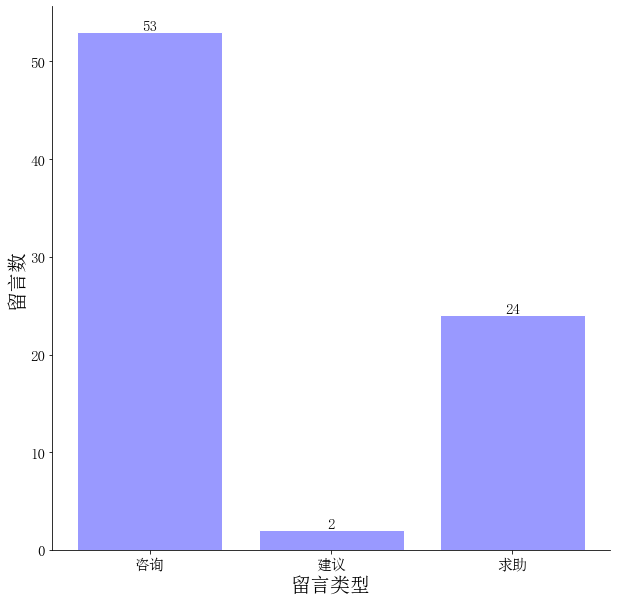

In [25]:
plt.figure(figsize=(10,10))
X=list(usedData.consultCategory.unique())
Y=[]
for i in X:
    Y.append(len(usedData[usedData.consultCategory==i].consultCategory))
plt.bar(X,Y,facecolor='#9999ff',edgecolor='white')
ax=plt.gca()
ax.patch.set_facecolor("white")             
ax.patch.set_alpha(0.5) 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
for x,y in zip(X,Y):
    plt.text(x,y,y,ha='center',va='bottom')
plt.xlabel('留言类型',fontsize=20)
plt.ylabel('留言数',fontsize=20)

<font size=5>上图可以得出结论，南阳市问政留言大部分为咨询留言</font>

Text(0, 0.5, '留言数')

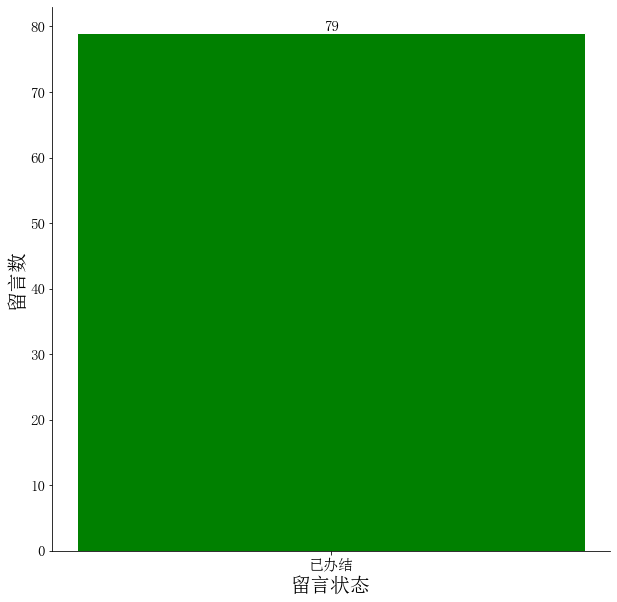

In [26]:
plt.figure(figsize=(10,10))
X2=list(usedData.consultState.unique())
Y2=[]
for i in X2:
    Y2.append(len(usedData[usedData.consultState==i].consultState))
plt.bar(X2,Y2,facecolor='green',edgecolor='white')
ax1=plt.gca()
ax1.patch.set_facecolor("white")             
ax1.patch.set_alpha(0.5) 
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
for x,y in zip(X2,Y2):
    plt.text(x,y,y,ha='center',va='bottom')
plt.xlabel('留言状态',fontsize=20)
plt.ylabel('留言数',fontsize=20)

<font size=5>由图以上图表可知，新疆维吾尔族自治区问政留言的回复率高达100%</font>

Text(0, 0.5, '留言数')

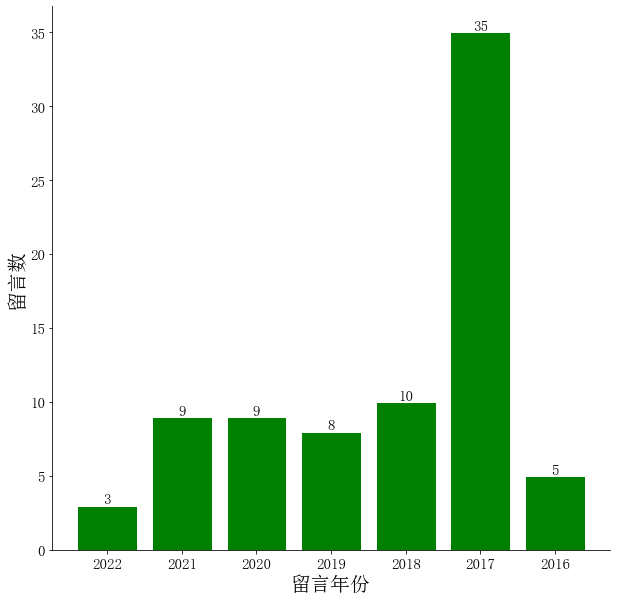

In [28]:
plt.figure(figsize=(10,10))
X3=list(usedData.year.unique())
Y3=[]
for i in X3:
    Y3.append(len(usedData[usedData.year==i].year))
plt.bar(X3,Y3,facecolor='green',edgecolor='white')
ax1=plt.gca()
ax1.patch.set_facecolor("white")             
ax1.patch.set_alpha(0.5) 
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
for x,y in zip(X3,Y3):
    plt.text(x,y,y,ha='center',va='bottom')
plt.xlabel('留言年份',fontsize=20)
plt.ylabel('留言数',fontsize=20)

<font size=5>由图表可以看出截止目前问政留言做多的年份为2017年</font>